In [13]:
from pipeline import Pipeline, Process, Postprocess, Preprocess
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
class MyPreProcess(Preprocess):
    process_desc = "Exemple de pre-process -> ne fait rien"
    def run(self, images):
        pass


class MyProcess(Process):
    process_desc = "Exemple de process -> ne fait rien"
    def run(self, images):
        pass
    
    
class MyPostProcess(Postprocess):
    process_desc = "Exemple de post-process -> ne fait rien"
    def run(self, images):
        pass

In [4]:
pipeline = Pipeline()
process_array = np.array([MyPreProcess()
                          ,MyProcess()
                          ,MyPostProcess()
                          ,MyPreProcess(verbose=0)])
pipeline.add_processes(process_array)

Preprocess :  Exemple de pre-process -> ne fait rien
Process :  Exemple de process -> ne fait rien
Postprocess :  Exemple de post-process -> ne fait rien
Exemple de pre-process -> ne fait rien a été ajouté.
Exemple de process -> ne fait rien a été ajouté.
Exemple de post-process -> ne fait rien a été ajouté.
Exemple de pre-process -> ne fait rien a été ajouté.


In [5]:
pipeline.print_process()

Exemple de pre-process -> ne fait rien
Exemple de pre-process -> ne fait rien
Exemple de process -> ne fait rien
Exemple de post-process -> ne fait rien


In [34]:
data = pd.read_csv('./../data/SEATGURU_INFO_AIRCRAFT.csv', sep = ';')
data.index = range(2, len(data) + 2)

In [36]:
data.head()

,Data_Source,Airline_name,Aircraft_Type,Category,Flight_Type,Count,Total_seat,Seat_Class,Seat_Type,Seat_Position,...,Width,Bedlength_maximum,Bedlength_minimum,Music,VideoType,Power_available,Power_kind,Usb_available,Usb_kind,Rating
2,SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,BULKHEAD,...,18.0,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,2
3,SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,NORMAL,...,18.0,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,2
4,SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,EXIT_ROW,...,18.0,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,5
5,SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,NORMAL,...,18.0,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,3
6,SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,NORMAL,...,18.0,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,1


In [8]:
data.columns

Index(['Data_Source', 'Airline_name', 'Aircraft_Type', 'Category',
       'Flight_Type', 'Count', 'Total_seat', 'Seat_Class', 'Seat_Type',
       'Seat_Position', 'Recline', 'Premium', 'Pitch_minimum', 'Pitch_maximum',
       'Width', 'Bedlength_maximum', 'Bedlength_minimum', 'Music', 'VideoType',
       'Power_available', 'Power_kind', 'Usb_available', 'Usb_kind', 'Rating'],
      dtype='object')

In [25]:
# data.groupby(['Aircraft_Type', 'Category']).agg(list)

In [100]:
test = data.groupby(['Airline_name', 'Aircraft_Type'])
test.groups

{('aegean-airlines',
  'ATR 42-600'): Int64Index([20, 21, 22, 23, 24], dtype='int64'),
 ('aegean-airlines',
  'Airbus A319-100'): Int64Index([2, 3, 4, 5, 6], dtype='int64'),
 ('aegean-airlines',
  'Airbus A320-200'): Int64Index([7, 8, 9, 10, 11, 12], dtype='int64'),
 ('aegean-airlines',
  'Airbus A321-200'): Int64Index([13, 14, 15, 16, 17, 18, 19], dtype='int64'),
 ('aegean-airlines',
  'Bombardier Dash 8 Q400'): Int64Index([25, 26, 27], dtype='int64'),
 ('aer-lingus',
  'Airbus A320'): Int64Index([237, 238, 239, 240, 241, 242], dtype='int64'),
 ('aer-lingus',
  'Airbus A321'): Int64Index([243, 244, 245, 246, 247], dtype='int64'),
 ('aer-lingus',
  'Airbus A330-200'): Int64Index([248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258], dtype='int64'),
 ('aer-lingus',
  'Airbus A330-200 B'): Int64Index([259, 260, 261, 262, 263, 264, 265, 266], dtype='int64'),
 ('aer-lingus',
  'Airbus A330-300 A'): Int64Index([267, 268, 269, 270, 271, 272, 273, 274], dtype='int64'),
 ('aer-lingus',
  'Bo

### Ajouter image au DF

In [130]:
def find_image(airline_aircraft):
    for i in l_result:
        if airline_aircraft == i[0]:
            return i[1]

In [137]:
data['airline_aircraft'] = data.apply(lambda x: x['Airline_name'].replace('-', '_') + '_' + x['Aircraft_Type'].replace(' ', '_'), axis = 'columns')
liste_image = os.listdir('./../data/LAYOUT SEATGURU/')
l_result = []
for i in data['airline_aircraft'].unique():
    for j in liste_image:
        if i.lower() in j.lower():
            l_result.append((i, j))
            break

data['image'] = data['airline_aircraft'].apply(lambda x: find_image(x))
# data.drop('airline_aircraft', axis = 'columns', inplace = True)

In [138]:
data.head()

,Data_Source,Airline_name,Aircraft_Type,Category,Flight_Type,Count,Total_seat,Seat_Class,Seat_Type,Seat_Position,...,Bedlength_minimum,Music,VideoType,Power_available,Power_kind,Usb_available,Usb_kind,Rating,image,airline_aircraft
2,SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,BULKHEAD,...,NaN,NONE,NONE,NONE,NaN,NONE,NaN,2,Aegean_Airlines_Airbus_A319-100_plane1.svg.png,aegean_airlines_Airbus_A319-100
3,SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,NORMAL,...,NaN,NONE,NONE,NONE,NaN,NONE,NaN,2,Aegean_Airlines_Airbus_A319-100_plane1.svg.png,aegean_airlines_Airbus_A319-100
4,SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,EXIT_ROW,...,NaN,NONE,NONE,NONE,NaN,NONE,NaN,5,Aegean_Airlines_Airbus_A319-100_plane1.svg.png,aegean_airlines_Airbus_A319-100
5,SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,NORMAL,...,NaN,NONE,NONE,NONE,NaN,NONE,NaN,3,Aegean_Airlines_Airbus_A319-100_plane1.svg.png,aegean_airlines_Airbus_A319-100
6,SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,NORMAL,...,NaN,NONE,NONE,NONE,NaN,NONE,NaN,1,Aegean_Airlines_Airbus_A319-100_plane1.svg.png,aegean_airlines_Airbus_A319-100


In [136]:
# data.to_csv('./../data/CSV_avec_image.csv', sep = ';')

### Nouveau CSV avec Image et lignes correspondantes

In [140]:
new_df = data[['airline_aircraft', 'image']]

In [141]:
new_df.head()

,airline_aircraft,image
2,aegean_airlines_Airbus_A319-100,Aegean_Airlines_Airbus_A319-100_plane1.svg.png
3,aegean_airlines_Airbus_A319-100,Aegean_Airlines_Airbus_A319-100_plane1.svg.png
4,aegean_airlines_Airbus_A319-100,Aegean_Airlines_Airbus_A319-100_plane1.svg.png
5,aegean_airlines_Airbus_A319-100,Aegean_Airlines_Airbus_A319-100_plane1.svg.png
6,aegean_airlines_Airbus_A319-100,Aegean_Airlines_Airbus_A319-100_plane1.svg.png


In [181]:
new_df = pd.DataFrame([list(new_df.groupby('image').groups.keys()), [list(i) for i in list(new_df.groupby('image').groups.values())]], index = ['image', 'lignes']).T

In [195]:
new_df = new_df.sort_values('lignes').reset_index(drop = True)

In [196]:
new_df.head()

,image,lignes
0,Aegean_Airlines_Airbus_A319-100_plane1.svg.png,"[2, 3, 4, 5, 6]"
1,Aegean_Airlines_Airbus_A320-200_plane2.svg.png,"[7, 8, 9, 10, 11, 12]"
2,Aegean_Airlines_Airbus_A321-200_plane1.svg.png,"[13, 14, 15, 16, 17, 18, 19]"
3,Aegean_Airlines_ATR_42-600_plane2.svg.png,"[20, 21, 22, 23, 24]"
4,Aegean_Airlines_Bombardier_Dash_8_Q400_plane3....,"[25, 26, 27]"


In [197]:
# new_df.to_csv('./../data/Image_lignes.csv', sep = ';')

### Autre

In [129]:
for i in data['airline_aircraft']:
    print(i)

aegean_airlines_Airbus_A319-100
aegean_airlines_Airbus_A319-100
aegean_airlines_Airbus_A319-100
aegean_airlines_Airbus_A319-100
aegean_airlines_Airbus_A319-100
aegean_airlines_Airbus_A320-200
aegean_airlines_Airbus_A320-200
aegean_airlines_Airbus_A320-200
aegean_airlines_Airbus_A320-200
aegean_airlines_Airbus_A320-200
aegean_airlines_Airbus_A320-200
aegean_airlines_Airbus_A321-200
aegean_airlines_Airbus_A321-200
aegean_airlines_Airbus_A321-200
aegean_airlines_Airbus_A321-200
aegean_airlines_Airbus_A321-200
aegean_airlines_Airbus_A321-200
aegean_airlines_Airbus_A321-200
aegean_airlines_ATR_42-600
aegean_airlines_ATR_42-600
aegean_airlines_ATR_42-600
aegean_airlines_ATR_42-600
aegean_airlines_ATR_42-600
aegean_airlines_Bombardier_Dash_8_Q400
aegean_airlines_Bombardier_Dash_8_Q400
aegean_airlines_Bombardier_Dash_8_Q400
aeroflot_Russian_Airlines_Airbus_330_200
aeroflot_Russian_Airlines_Airbus_330_200
aeroflot_Russian_Airlines_Airbus_330_200
aeroflot_Russian_Airlines_Airbus_330_200
aeroflot

ana_Boeing_767-300ER_B
ana_Boeing_767-300ER_B
ana_Boeing_767-300ER_B
ana_Boeing_767-300ER_B
ana_Boeing_767-300ER_B
ana_Boeing_767-300ER_B
ana_Boeing_767-300ER_B
ana_Boeing_767-300ER_B
ana_Boeing_767-300ER_B
ana_Boeing_777-200ER_A
ana_Boeing_777-200ER_A
ana_Boeing_777-200ER_A
ana_Boeing_777-200ER_A
ana_Boeing_777-200ER_A
ana_Boeing_777-200ER_A
ana_Boeing_777-200ER_A
ana_Boeing_777-200ER_A
ana_Boeing_777-200ER_A
ana_Boeing_777-200ER_A
ana_Boeing_777-200ER_A
ana_Boeing_777-200ER_A
ana_Boeing_777-200ER_B
ana_Boeing_777-200ER_B
ana_Boeing_777-200ER_B
ana_Boeing_777-200ER_B
ana_Boeing_777-200ER_B
ana_Boeing_777-200ER_B
ana_Boeing_777-200ER_B
ana_Boeing_777-200ER_B
ana_Boeing_777-200ER_B
ana_Boeing_777-200ER_B
ana_Boeing_777-300ER_D
ana_Boeing_777-300ER_D
ana_Boeing_777-300ER_D
ana_Boeing_777-300ER_D
ana_Boeing_777-300ER_D
ana_Boeing_777-300ER_D
ana_Boeing_777-300ER_D
ana_Boeing_777-300ER_D
ana_Boeing_777-300ER_D
ana_Boeing_777-300ER_D
ana_Boeing_777-300ER_D
ana_Boeing_777-300ER_D
ana_Boeing_

dragonair_Airlines_Airbus_A330-300_A
dragonair_Airlines_Airbus_A330-300_A
dragonair_Airlines_Airbus_A330-300_A
dragonair_Airlines_Airbus_A330-300_A
dragonair_Airlines_Airbus_A330-300_A
dragonair_Airlines_Airbus_A330-300_A
dragonair_Airlines_Airbus_A330-300_A
dragonair_Airlines_Airbus_A330-300_B
dragonair_Airlines_Airbus_A330-300_B
dragonair_Airlines_Airbus_A330-300_B
dragonair_Airlines_Airbus_A330-300_B
dragonair_Airlines_Airbus_A330-300_B
dragonair_Airlines_Airbus_A330-300_B
dragonair_Airlines_Airbus_A330-300_B
easyjet_Airlines_Airbus_A319
easyjet_Airlines_Airbus_A319
easyjet_Airlines_Airbus_A319
easyjet_Airlines_Airbus_A319
easyjet_Airlines_Airbus_A319
easyjet_Airlines_Airbus_A319
easyjet_Airlines_Airbus_A319
easyjet_Airlines_Airbus_A320
easyjet_Airlines_Airbus_A320
easyjet_Airlines_Airbus_A320
easyjet_Airlines_Airbus_A320
easyjet_Airlines_Airbus_A320
easyjet_Airlines_Airbus_A320
easyjet_Airlines_Airbus_A320
easyjet_Airlines_Airbus_A320_V2
easyjet_Airlines_Airbus_A320_V2
easyjet_Airl

lot_polish_airlines_LO_Boeing_737_MAX_8
lot_polish_airlines_LO_Boeing_737_MAX_8
lot_polish_airlines_LO_Boeing_737_MAX_8
lot_polish_airlines_LO_Boeing_737_MAX_8
lot_polish_airlines_LO_Boeing_737_MAX_8
lufthansa_Airbus_A319-100_NEK
lufthansa_Airbus_A319-100_NEK
lufthansa_Airbus_A319-100_NEK
lufthansa_Airbus_A319-100_NEK
lufthansa_Airbus_A319-100_NEK
lufthansa_Airbus_A319-100_NEK
lufthansa_Airbus_A319-100_NEK
lufthansa_Airbus_A320-200_NEK
lufthansa_Airbus_A320-200_NEK
lufthansa_Airbus_A320-200_NEK
lufthansa_Airbus_A320-200_NEK
lufthansa_Airbus_A320-200_NEK
lufthansa_Airbus_A320-200_NEK
lufthansa_Airbus_A320-200_NEK
lufthansa_Airbus_A320-200_NEK
lufthansa_Airbus_A320neo
lufthansa_Airbus_A320neo
lufthansa_Airbus_A320neo
lufthansa_Airbus_A320neo
lufthansa_Airbus_A320neo
lufthansa_Airbus_A320neo
lufthansa_Airbus_A320neo
lufthansa_Airbus_A320neo
lufthansa_Airbus_A321_NEK
lufthansa_Airbus_A321_NEK
lufthansa_Airbus_A321_NEK
lufthansa_Airbus_A321_NEK
lufthansa_Airbus_A321_NEK
lufthansa_Airbus_A32

srilankan_airlines_Airbus_320-200_v1
srilankan_airlines_Airbus_320-200_v1
srilankan_airlines_Airbus_320-200_v1
srilankan_airlines_Airbus_320-200_v1
srilankan_airlines_Airbus_320-200_v1
srilankan_airlines_Airbus_320-200_v1
srilankan_airlines_Airbus_320-200_v1
srilankan_airlines_Airbus_320neo
srilankan_airlines_Airbus_320neo
srilankan_airlines_Airbus_320neo
srilankan_airlines_Airbus_320neo
srilankan_airlines_Airbus_320neo
srilankan_airlines_Airbus_320neo
srilankan_airlines_Airbus_320neo
srilankan_airlines_Airbus_320neo
srilankan_airlines_Airbus_320neo
srilankan_airlines_Airbus_321
srilankan_airlines_Airbus_321
srilankan_airlines_Airbus_321
srilankan_airlines_Airbus_321
srilankan_airlines_Airbus_321
srilankan_airlines_Airbus_321
srilankan_airlines_Airbus_321
srilankan_airlines_Airbus_321neo
srilankan_airlines_Airbus_321neo
srilankan_airlines_Airbus_321neo
srilankan_airlines_Airbus_321neo
srilankan_airlines_Airbus_321neo
srilankan_airlines_Airbus_321neo
srilankan_airlines_Airbus_321neo
sri

In [10]:
path = './../data/LAYOUT SEATGURU/'
df = pd.DataFrame({'img': os.listdir('./../data/LAYOUT SEATGURU/'), 'chemin': [path + img_name for img_name in os.listdir('./../data/LAYOUT SEATGURU/')]})

In [11]:
df.head()

,img,chemin
0,Aegean_Airlines_Airbus_A319-100_plane1.svg.png,./../data/LAYOUT SEATGURU/Aegean_Airlines_Airb...
1,Aegean_Airlines_Airbus_A320-200_plane2.svg.png,./../data/LAYOUT SEATGURU/Aegean_Airlines_Airb...
2,Aegean_Airlines_Airbus_A321-200_plane1.svg.png,./../data/LAYOUT SEATGURU/Aegean_Airlines_Airb...
3,Aegean_Airlines_Airbus_A321-200_plane3.svg.png,./../data/LAYOUT SEATGURU/Aegean_Airlines_Airb...
4,Aegean_Airlines_ATR_42-600_plane2.svg.png,./../data/LAYOUT SEATGURU/Aegean_Airlines_ATR_...


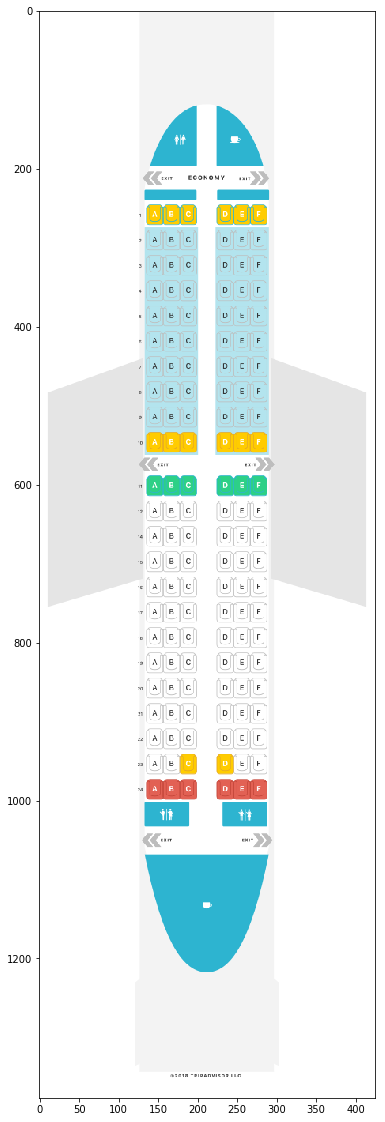

In [16]:
img = plt.imread(df['chemin'][0])
figure = plt.figure(figsize = (20, 20))
plt.imshow(img)

In [ ]:
cv2.destroyAllWindows()